# PRÁCTICA 1
# CUANTIFICACIÓN UNIFORME Y DITHERING

## La clase uniformeSQ
La clase UniformSQ implementada en scalib permite construir cuantificadores uniformes a partir
de una tasa de bits por muestra deseada (que establece el número de niveles de cuantificación) y el
rango de entrada del cuantificador (rango de las señales que vamos a cuantificar). A continuación se
muestra un ejemplo de uso de UniformSQ para cuantificar una señal unidimensional

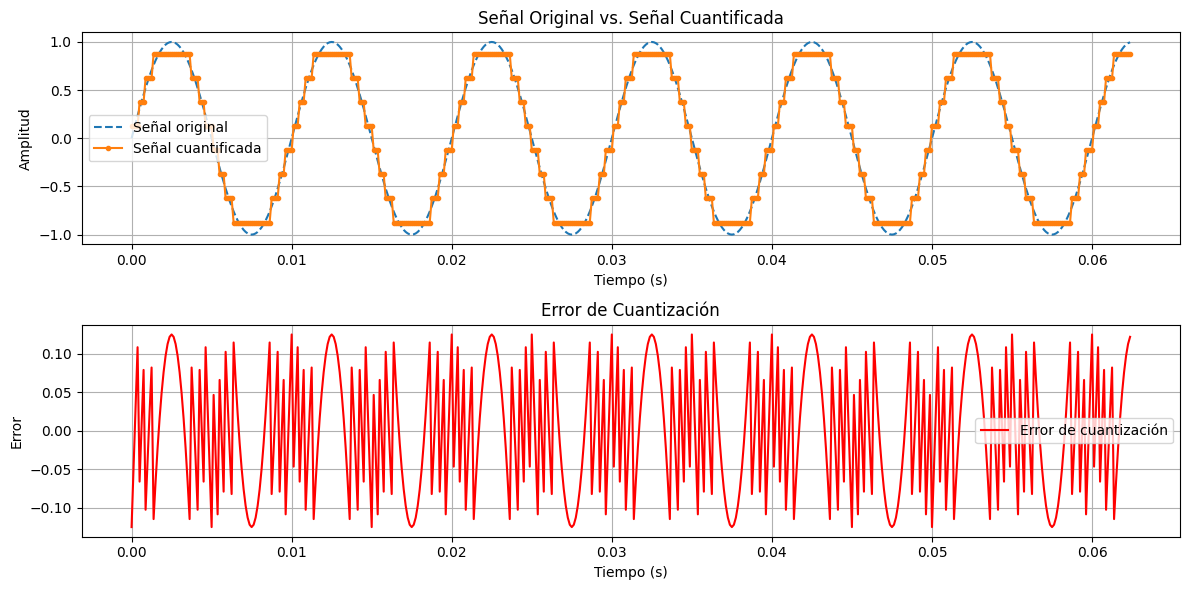

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ

#? Parámetros de la señal
fs = 8000  # Frecuencia de muestreo de 8 kHz
t = np.arange(0, 2, 1/fs)  # Vector de tiempos de 2 segundos de duración
x = np.sin(2 * np.pi * 100 * t)  # Señal sinusoidal de 100 Hz

#? Configuración de la cuantización
xRange = (-1, 1)  # Rango de la señal x
b = 3  # Número de bits por muestra

#? Cuantificación uniforme
qtz = UniformSQ(b, xRange)  # Creación del cuantificador
xq = qtz.quantize(x)  # Cuantificación de la señal

#? Cálculo del error de cuantización
error = x - xq

#? Representacioes gráficas
plt.figure(figsize=(12, 6))

# Gráfica de la señal original y cuantificada
plt.subplot(2, 1, 1)
plt.plot(t[:500], x[:500], label="Señal original", linestyle='dashed')
plt.plot(t[:500], xq[:500], label="Señal cuantificada", marker='o', markersize=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Original vs. Señal Cuantificada")
plt.legend()
plt.grid()

# Gráfica del error de cuantización
plt.subplot(2, 1, 2)
plt.plot(t[:500], error[:500], color="red", label="Error de cuantización")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error")
plt.title("Error de Cuantización")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# Ejercicio 1

Construya dos cuantificadores uniformes, uno de media contrahuella y otro de media huella. En ambos casos, la tasa de bits por muestra resultante debe ser de 3 bits. Use ambos cuantificadores para cuantificar 3 señales:

- Una señal sinusoidal de 50 Hz y 1 s de duración muestreada a 8 kHz.
- La señal de voz almacenada en el archivo `altura.wav`.
- La imagen de Lena (almacenada en el archivo `lena.png`).

Calcule la SNR de cuantificación para todas las señales cuantificadas (6 en total), reproduzca las señales de voz y represente las imágenes. Comente las diferencias en cuanto a SNR y calidad percibida de las señales, comparando los dos cuantificadores.

En base a los resultados obtenidos, indique justificadamente las ventajas e inconvenientes de los cuantificadores de media contrahuella y los de media huella.


SNR Señal Sinusoidal - Midrise: 19.11 dB
SNR Señal Sinusoidal - Midtread: 17.90 dB
SNR Imagen - Midrise: 15.60 dB
SNR Imagen - Midtread: 12.90 dB
SNR Señal de Voz - Midrise: -1.43 dB
SNR Señal de Voz - Midtread: 5.03 dB
Reproduciendo señal cuantificada - Midrise...
Reproduciendo señal cuantificada - Midtread...


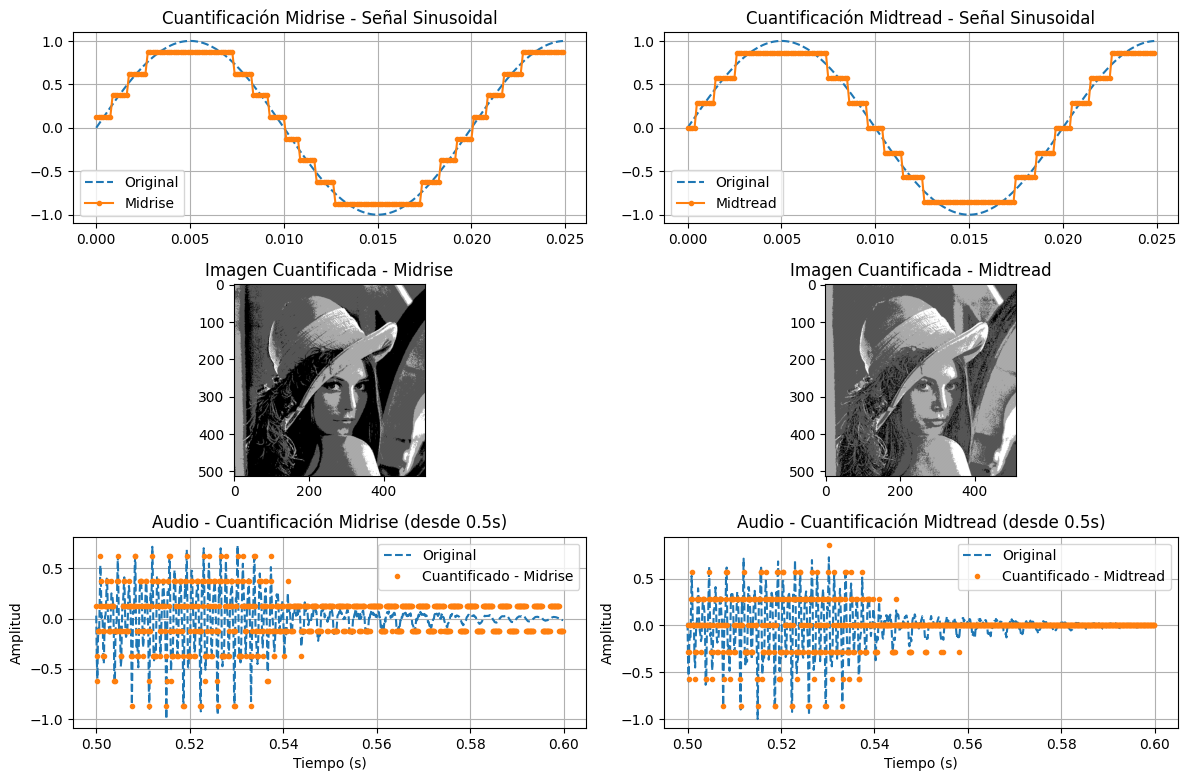

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from skimage import io, color
from scalib import UniformSQ, snr
from scipy.io import wavfile
import os


#? 1. Generar una señal sinusoidal de 50 Hz muestreada a 8 kHz
fs = 8000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # 1 segundo de duración
x_sin = np.sin(2 * np.pi * 50 * t)  # Señal sinusoidal

#? 2. Cargar la señal de voz altura.wav
fs_audio, x_audio = wavfile.read("Datos/altura.wav")  # Leer archivo de audio
x_audio = x_audio / np.max(np.abs(x_audio))   # Normalizar a rango (-1,1)

#? 3. Cargar la imagen lena.png en escala de grises
img = io.imread("Datos/lena.png")
img_gray = color.rgb2gray(img)  # Convertir a escala de grises
img_gray = img_gray / np.max(img_gray)  # Normalizar a (0,1)

#? Configuración de cuantificadores
b = 3               # 3 bits por muestra
xRange = (-1, 1)    # Rango de entrada

qtz_midrise = UniformSQ(b, xRange, qtype="midrise")   # Cuantificador de media contrahuella
qtz_midtread = UniformSQ(b, xRange, qtype="midtread") # Cuantificador de media huella

# Cuantificación de la señal sinusoidal
xq_sin_midrise = qtz_midrise.quantize(x_sin)
xq_sin_midtread = qtz_midtread.quantize(x_sin)
# Cuantificación de la señal de voz
xq_audio_midrise = qtz_midrise.quantize(x_audio)
xq_audio_midtread = qtz_midtread.quantize(x_audio)
# Cuantificación de la imagen
xq_img_midrise = qtz_midrise.quantize(img_gray)
xq_img_midtread = qtz_midtread.quantize(img_gray)

#? Cálculo de SNR
snr_sin_midrise = snr(x_sin, xq_sin_midrise)
snr_sin_midtread = snr(x_sin, xq_sin_midtread)

snr_audio_midrise = snr(x_audio, xq_audio_midrise)
snr_audio_midtread = snr(x_audio, xq_audio_midtread)

snr_img_midrise = snr(img_gray, xq_img_midrise)
snr_img_midtread = snr(img_gray, xq_img_midtread)

# Mostrar resultados de SNR
print(f"SNR Señal Sinusoidal - Midrise: {snr_sin_midrise:.2f} dB")
print(f"SNR Señal Sinusoidal - Midtread: {snr_sin_midtread:.2f} dB")

print(f"SNR Imagen - Midrise: {snr_img_midrise:.2f} dB")
print(f"SNR Imagen - Midtread: {snr_img_midtread:.2f} dB")

print(f"SNR Señal de Voz - Midrise: {snr_audio_midrise:.2f} dB")
print(f"SNR Señal de Voz - Midtread: {snr_audio_midtread:.2f} dB")

#? Representación gráfica de la cuantificación
plt.figure(figsize=(12, 10))

# Señal sinusoidal cuantificada
plt.subplot(4, 2, 1)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midrise[:200], label="Midrise", marker='o', markersize=3)
plt.title("Cuantificación Midrise - Señal Sinusoidal")
plt.legend()
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midtread[:200], label="Midtread", marker='o', markersize=3)
plt.title("Cuantificación Midtread - Señal Sinusoidal")
plt.legend()
plt.grid()

# Imagen cuantificada
plt.subplot(4, 2, 3)
plt.imshow(xq_img_midrise, cmap='gray')
plt.title("Imagen Cuantificada - Midrise")

plt.subplot(4, 2, 4)
plt.imshow(xq_img_midtread, cmap='gray')
plt.title("Imagen Cuantificada - Midtread")

# Reproducir las señales de voz cuantificadas
print("Reproduciendo señal cuantificada - Midrise...")
sd.play(xq_audio_midrise, fs_audio)
sd.wait()

print("Reproduciendo señal cuantificada - Midtread...")
sd.play(xq_audio_midtread, fs_audio)
sd.wait()

# Segmento de la señal de audio a partir del segundo 0.5
t_audio = np.arange(0, len(x_audio)) / fs_audio
start_idx = int(0.5 * fs_audio)
end_idx = start_idx + 800

t_seg = t_audio[start_idx:end_idx]
x_audio_seg = x_audio[start_idx:end_idx]
xq_audio_midrise_seg = xq_audio_midrise[start_idx:end_idx]
xq_audio_midtread_seg = xq_audio_midtread[start_idx:end_idx]

# Señal de audio cuantificada - Midrise
plt.subplot(4, 2, 5)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midrise_seg, label="Cuantificado - Midrise", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificación Midrise (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Señal de audio cuantificada - Midtread
plt.subplot(4, 2, 6)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midtread_seg, label="Cuantificado - Midtread", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificación Midtread (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Ambos cuantificadores discretizan el rango `[-1, 1]`, pero lo hacen de forma distinta:

#### 🟩 Midrise (media contrahuella)
- Divide el rango `[-1, 1]` en **8 niveles** uniformemente espaciados.
- Los niveles están **centrados entre los límites de los intervalos**.
- El primer nivel comienza en `q/2` y el último termina en `1 - q/2`.
- No incluye un nivel de cuantificación exactamente en 0 o 1.

#### 🟦 Midtread (media huella)
- Usa **7 niveles** (`2^3 - 1 = 7`) para la misma tasa de bits.
- Incluye un nivel de cuantificación exactamente en **0.5** (el valor medio del rango).
- Tiende a centrar más los niveles cerca del centro del rango.

Para la señal sinusoide, se obtiene algo fácilmente deducible según lo comentado anteriormente.

En la imagen, se ha utilizado los dos tipos de cuantizador. Como resultado, puede dar lugar a una cuantificación más **agresiva en los extremos** y más suave en valores comunes (como los tonos de piel en la imagen de Lena). Este comportamiento diferente se traduce visualmente en diferencias en el contraste y los detalles representados, especialmente en zonas con transiciones suaves de gris.

Por último, para la señal de audio obtenemos un resultado interesante. Puesto que el cuantizador de media huella incluye un nivel exacto en 0, cuando reproducimos la señal cuantificada de audio con este cuantizador, se perciben "cortes" en el audio. Esto se debe a que la señal resultante no discrimina entre un valor cero y un valor parecido a cero (no discrimina el posible ruido) y, puesto que la señal de audio toma valores "iguales" a cero con mayor probabilidad, el resultado es una SNR mayor.

Por ello, cuando cuantificamos en media contrahuella, escuchamos en todo momento un "ruido" de fondo y ligeramente más precisión de cuantización en los extremos. La SNR comparada con el caso anterior es menor.

# Ejercicio 2

En este ejercicio trabajaremos con la cuantificación de una señal sinusoidal de 50 Hz y 1 segundo de duración, muestreada a 8 kHz. A continuación, se muestran paso a paso las tareas solicitadas, junto con explicaciones y el código en Python.

---

### 1. Generación de la señal y cuantificación

1. **Señal sinusoidal**  
   - Frecuencia: 50 Hz  
   - Duración: 1 s  
   - Frecuencia de muestreo: 8 kHz  
   - Por tanto, el número de muestras total es 8000.

2. **Cuantificador uniforme de media contrahuella (midrise)**  
   - Tasa de bits por muestra: 3 bits  
   - El número de niveles de cuantificación en modo “media contrahuella” es $L = 2^b = 8 $.  
   - El tamaño del cuanto $q$ se obtiene a partir del rango de la señal. Puesto que la sinusoidal generada va de -1 a 1, el rango es 2. Entonces, $q = \frac{2}{8} = 0.25$.  
   - Observa que en un cuantificador de media contrahuella no existe un nivel exactamente igual a 0.  


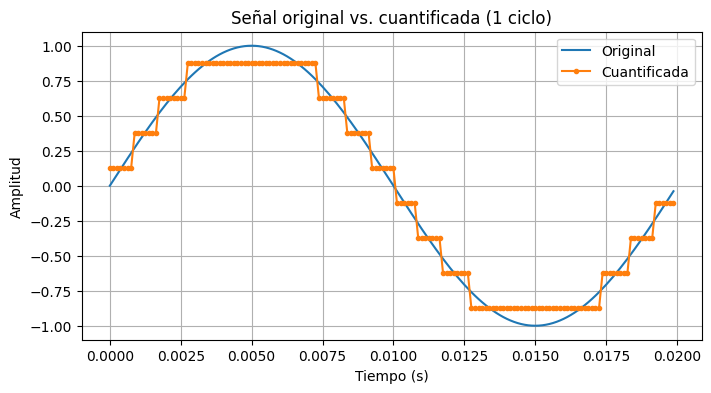

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, snr, toDB

#? 1. Generación de la señal sinusoidal
fs = 8000            # Frec. de muestreo
f = 50               # Frecuencia de la seno
t = np.arange(0, 1, 1/fs)  # Vector de tiempo, 1 s de duración
x = np.sin(2 * np.pi * f * t)  # Señal sinusoidal

#? 2. Cuantificador uniforme de media contrahuella
b = 3
xRange = (-1, 1)  # Rango de la señal, pues x va de -1 a 1
qtz = UniformSQ(b, xRange, qtype='midrise')  # Cuantificador midrise
xq = qtz.quantize(x)                         # Señal cuantificada

#? 3. Representación de la señal original y cuantificada en 1 ciclo (160 muestras)
nCiclo = 160
plt.figure(figsize=(8,4))
plt.plot(t[:nCiclo], x[:nCiclo], label='Original')
plt.plot(t[:nCiclo], xq[:nCiclo], label='Cuantificada', marker='o', markersize=3)
plt.title('Señal original vs. cuantificada (1 ciclo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### Preguntas:
 - **¿Cuántos niveles de cuantificación se aprecian?**

   Se aprecian 8 niveles (pues b=3 bits => $2^3=8$ niveles).

 - **¿Hay algún nivel de valor 0?**

   No, en midrise no se incluye el nivel 0 exactamente, por construcción.

 - **¿Es este el resultado esperado?**

   Sí, porque el cuantificador de media contrahuella desplaza los niveles
   de modo que no coincidan con 0.
___

### 2. Cálculo de la potencia del error de cuantificación y comparación teórica

1. Potencia experimental del error

   - Se define el error de cuantificación como $e[n] = x[n] - x_q[n]$.
 
   - La potencia media del error (MSE) es $P_e = E[e^2[n]]$.
        Para mayor comodidad, podemos expresarla en decibelios usando $10 \log_{10}(P_e)$.

2. Potencia teórica del error

   - Para un cuantificador uniforme midrise con paso $q$, la potencia del error (para una señal bien ajustada al rango) suele aproximarse por $q^2 / 12$.

   - Dado $q = 0.25$, $q^2 = 0.0625$. Entonces $\frac{q^2}{12} = \frac{0.0625}{12} \approx 0.0052083$.

   - En decibelios, $10 \log_{10}(0.0052083) \approx -22.83 \text{ dB}$.

In [ ]:

#? 4. Cálculo de la potencia del error
error = x - xq

# Calcular la potencia del error experimental
Pe = 0
for e in error:
        Pe += e**2
Pe /= len(error)

Pe_dB = 10 * np.log10(Pe)
q = (xRange[1] - xRange[0]) / 2**b  # = 2 / 8 = 0.25
Pe_teorica = q**2 / 12
Pe_teorica_dB = 10 * np.log10(Pe_teorica)

print(f"Potencia del error experimental (lineal): {Pe:.6f}")
print(f"Potencia del error experimental (dB): {Pe_dB:.2f} dB")
print(f"Potencia teórica del error (lineal): {Pe_teorica:.6f}")
print(f"Potencia teórica del error (dB): {Pe_teorica_dB:.2f} dB")


Potencia del error experimental (lineal): 0.006194
Potencia del error experimental (dB): -22.08 dB
Potencia teórica del error (lineal): 0.005208
Potencia teórica del error (dB): -22.83 dB


La potencia del error de cuantificación uniforme se puede aproximar teóricamente cuando se modela el error como una variable aleatoria uniforme en el intervalo $\left[-\frac{q}{2}, \frac{q}{2}\right]$, donde $q$ es el tamaño del cuanto. Dado que la media de esta distribución es cero, la potencia del error coincide con su varianza:

$$
P_e = \text{Var}(e) = \frac{q^2}{12}
$$

Esta expresión es válida bajo la suposición de que la señal es suficientemente compleja y el error no está correlacionado con ella. Dado que la densidad es constante (distribución uniforme), $f(e) = \frac{1}{q}$, la potencia es:

$$
P_e = \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \cdot \frac{1}{q} \, de = \frac{1}{q} \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \, de = \frac{1}{q} \left[\frac{e^3}{3}\right]_{-\frac{q}{2}}^{\frac{q}{2}} =\frac{1}{q} \frac{q^3}{12} = \frac{q^2}{12}
$$

Por ejemplo, si $q = 0.25$, entonces:

$$
P_e = \frac{0.25^2}{12} = \frac{0.0625}{12} \approx 0.005208
$$

Y en decibelios:

$$
P_{\text{dB}} = 10 \log_{10}(0.005208) \approx -22.83\ \text{dB}
$$

**La potencia experimental del error puede diferir ligeramente de la teórica debido a:**
 - El uso de un número finito de muestras (solo 1s de duración).
 - La posible ligera desadaptación del rango si la señal no ocupa perfectamente -1 a 1.
___

### 3. Cálculo y representación del espectro
- Para visualizar el espectro de la señal original y la señal cuantificada, podemos usar la Transformada Rápida de Fourier (FFT).

- Observaremos cómo la cuantificación introduce distorsión (armónicos adicionales y ensanchamiento espectral).

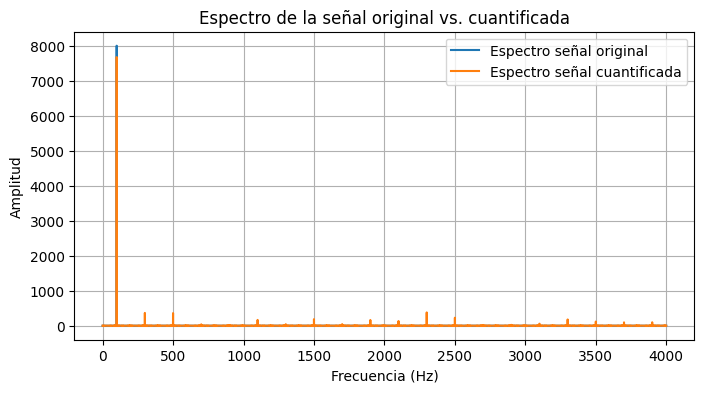

In [15]:
# 5. Cálculo y representación del espectro
X = np.fft.fft(x)
Xq = np.fft.fft(xq)
N = len(x)
freq = np.fft.fftfreq(N, d=1/fs)

# Nos quedamos con la mitad del espectro (parte positiva)
half = N // 2
plt.figure(figsize=(8,4))
plt.plot(freq[:half], np.abs(X[:half]), label='Espectro señal original')
plt.plot(freq[:half], np.abs(Xq[:half]), label='Espectro señal cuantificada')
plt.title('Espectro de la señal original vs. cuantificada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




# Ejercicio 3



--- Dither: rectangular ---
Potencia teórica dither  : 0.005208
Potencia experimental    : 0.005279
Error teórico (aprox)    : 0.010417
Error experimental       : 0.009763

--- Dither: triangular ---
Potencia teórica dither  : 0.010417
Potencia experimental    : 0.010501
Error teórico (aprox)    : 0.015625
Error experimental       : 0.013560

--- Dither: gaussian ---
Potencia teórica dither  : 0.015625
Potencia experimental    : 0.015929
Error teórico (aprox)    : 0.020833
Error experimental       : 0.017537


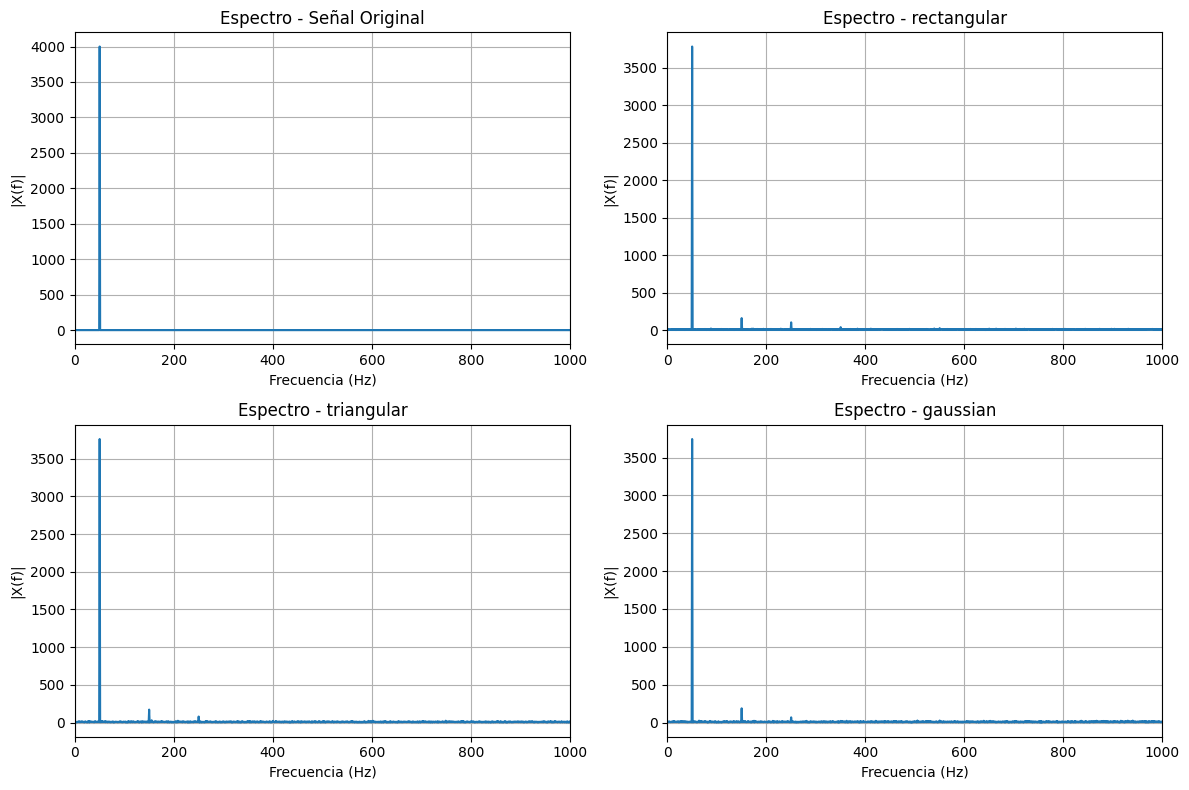

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, genDither, snr
import scipy.fft

# 1) Generar señal sinusoidal
fs = 8000
t = np.arange(0, 1, 1/fs)  # 1 segundo
x = np.sin(2 * np.pi * 50 * t)  # señal sinusoidal de 50 Hz

# 2) Configurar cuantificador uniforme (3 bits, midrise)
b = 3
xRange = (-1, 1)
qtz_midrise = UniformSQ(b, xRange, qtype="midrise")  # media contrahuella
q = qtz_midrise.q  # tamaño del cuanto

# Tipos de dither a probar
dither_types = ["rectangular", "triangular", "gaussian"]

# Almacenar resultados para cada tipo de dither
results = {}

for dither_pdf in dither_types:
    # 3) Generar dither con la amplitud correspondiente al cuantificador
    dither = genDither(len(x), q, pdf=dither_pdf)  # según la práctica

    # Potencia teórica del dither, según la PDF
    if dither_pdf == "rectangular":
        p_dither_theory = q**2 / 12.0
    elif dither_pdf == "triangular":
        p_dither_theory = q**2 / 6.0
    elif dither_pdf == "gaussian":
        p_dither_theory = q**2 / 4.0
    
    # 4) Añadir dither a la señal
    x_dithered = x + dither  # Ojo con saturación si se sale de (-1,1)

    # Potencia experimental del dither
    p_dither_exp = np.mean(dither**2)

    # 5) Cuantificar la señal ditherizada
    xq_dithered = qtz_midrise.quantize(x_dithered)

    # 6) Calcular error de cuantificación
    error = x - xq_dithered
    p_error_exp = np.mean(error**2)

    # Potencia teórica esperada del error total (aprox).
    # Sin correlación, error total ~ error cuant. + p_dither_theory,
    # donde error cuant. ~ q^2/12. Pero aquí ya tenemos
    # un modelo simple: p_error_teo ~ (q^2/12) + p_dither_theory
    # Nota: Este modelo es muy aproximado.
    p_error_teo = (q**2 / 12.0) + p_dither_theory

    # Guardar resultados
    results[dither_pdf] = {
        "p_dither_theory": p_dither_theory,
        "p_dither_exp": p_dither_exp,
        "p_error_theory": p_error_teo,
        "p_error_exp": p_error_exp,
        "xq_dithered": xq_dithered
    }

# 7) Imprimir resultados
for dither_pdf, vals in results.items():
    print(f"\n--- Dither: {dither_pdf} ---")
    print(f"Potencia teórica dither  : {vals['p_dither_theory']:.6f}")
    print(f"Potencia experimental    : {vals['p_dither_exp']:.6f}")
    print(f"Error teórico (aprox)    : {vals['p_error_theory']:.6f}")
    print(f"Error experimental       : {vals['p_error_exp']:.6f}")

# 8) Representar espectros: original vs. cada dither
plt.figure(figsize=(12, 8))

# Espectro de la señal original
X_orig = np.fft.fft(x)
faxis = np.fft.fftfreq(len(x), 1/fs)
plt.subplot(2, 2, 1)
plt.plot(faxis, np.abs(X_orig), label="Original", color='C0')
plt.title("Espectro - Señal Original")
plt.xlim([0, 1000])  # zona de interés
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("|X(f)|")
plt.grid()

# Para cada dither, mostrar espectro de la señal cuantificada
for i, dither_pdf in enumerate(dither_types, start=2):
    xqd = results[dither_pdf]["xq_dithered"]
    Xqd = np.fft.fft(xqd)
    plt.subplot(2, 2, i)
    plt.plot(faxis, np.abs(Xqd), label=f"Cuant. + {dither_pdf}")
    plt.title(f"Espectro - {dither_pdf}")
    plt.xlim([0, 1000])
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("|X(f)|")
    plt.grid()

plt.tight_layout()
plt.show()
